<a href="https://colab.research.google.com/github/AnjaliRana18/Breast_Cancer_Classification/blob/main/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data
from google.colab import files
upload = files.upload()

Saving cleandata.csv to cleandata.csv


In [ ]:
df = pd.read_csv('cleandata.csv')
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
444,3,1,1,1,2,1,2,1,2,0
445,3,1,1,1,3,2,1,1,1,0
446,5,10,10,3,7,3,8,10,2,1
447,4,8,6,4,3,4,10,6,1,1


In [ ]:
#Count the no. of rows and columns in cleaned dataset
df.shape

(449, 10)

In [ ]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   clump_thickness    449 non-null    int64
 1   size_uniformity    449 non-null    int64
 2   shape_uniformity   449 non-null    int64
 3   marginal_adhesion  449 non-null    int64
 4   epithelial_size    449 non-null    int64
 5   bare_nucleoli      449 non-null    int64
 6   bland_chromatin    449 non-null    int64
 7   normal_nucleoli    449 non-null    int64
 8   mitoses            449 non-null    int64
 9   class              449 non-null    int64
dtypes: int64(10)
memory usage: 35.2 KB


In [ ]:
#describe dataset
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,5.378619,4.222717,4.273942,3.746102,3.879733,4.806236,4.200445,3.828508,1.913140,0.525612
std,2.869029,3.251280,3.141494,3.158413,2.456544,3.880509,2.651634,3.387146,2.068909,0.499901
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Separation of dataset

0 --> Benign

1 --> Malignant

In [ ]:
#Get a count of the  number of Malignant (1) and Benign(0) cells
df['class'].value_counts()

1    236
0    213
Name: class, dtype: int64

In [ ]:
X = df.iloc[:,0:9].values
Y = df.iloc[:, 9].values

In [ ]:
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [ ]:
Y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
# Splitting the dataset into the Training set and Test set
# split 70:30

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state =1,stratify=Y)

In [ ]:
(unique, counts) = np.unique(Y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 149]
 [  1 165]]


In [ ]:
(unique, counts) = np.unique(Y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[ 0 64]
 [ 1 71]]


BUILDING MODEL

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)

#
Y_pred_LG=logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix_LG = metrics.confusion_matrix(Y_test, Y_pred_LG)
cnf_matrix_LG

array([[58,  6],
       [ 3, 68]])

Text(0.5, 257.44, 'Predicted label')

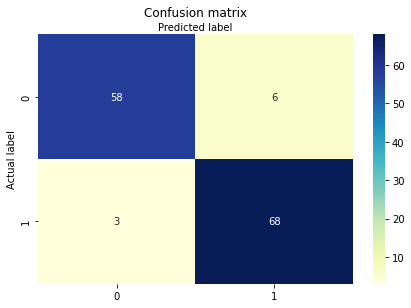

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LG), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_LG)
precision = metrics.precision_score(Y_test, Y_pred_LG)
recall = metrics.recall_score(Y_test, Y_pred_LG)
F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F-score : ",F1)

Accuracy :  0.9333333333333333
Precision :  0.918918918918919
Recall :  0.9577464788732394
F-score :  0.9379310344827587


2. decision tree

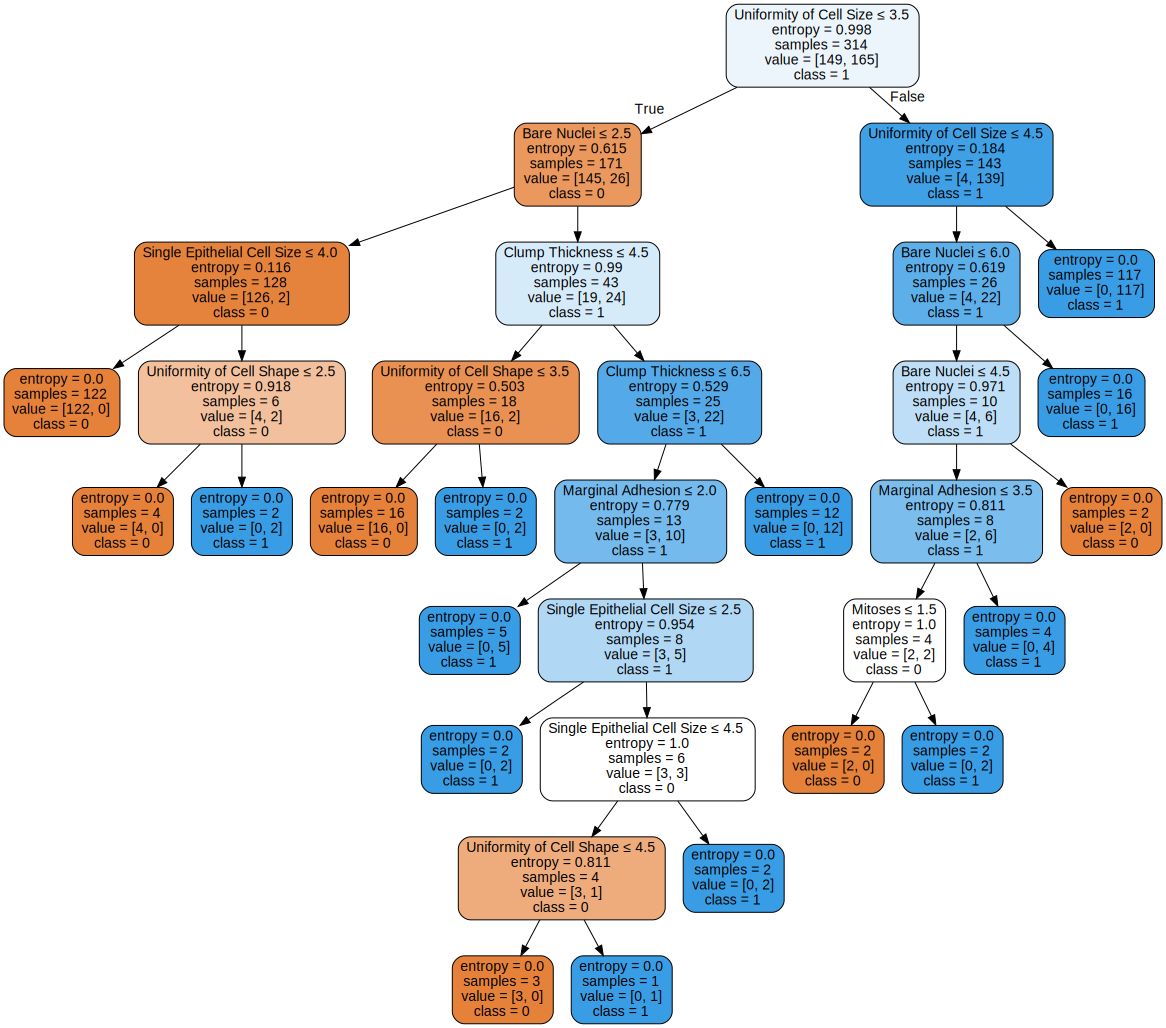

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 


# Information gain
decisiontree = tree.DecisionTreeClassifier(criterion="entropy")
decisiontree = decisiontree.fit(X_train, Y_train)
Y_pred_DT = decisiontree.predict(X_test)
feature_names = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei" ,
                            "Bland Chromatin", "Normal Nucleoli", "Mitoses"]
infoG_tree = tree.export_graphviz(decisiontree , out_file= None, feature_names=feature_names, class_names='01', filled=True, rounded=True, special_characters=True)

infoG_graph = graphviz.Source(infoG_tree)
infoG_graph

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix_DT = metrics.confusion_matrix(Y_test, Y_pred_DT)
cnf_matrix_DT

array([[58,  6],
       [ 3, 68]])

Text(0.5, 257.44, 'Predicted label')

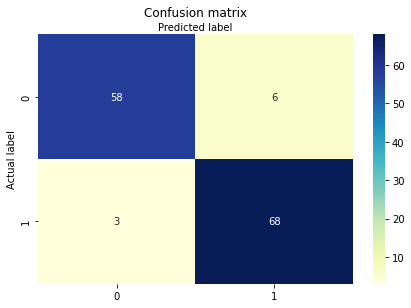

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_DT)
precision = metrics.precision_score(Y_test, Y_pred_DT)
recall = metrics.recall_score(Y_test, Y_pred_DT)
F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F-score : ",F1)

Accuracy :  0.9333333333333333
Precision :  0.918918918918919
Recall :  0.9577464788732394
F-score :  0.9379310344827587


3. Naive Bayes

In [ ]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

GaussNB = GaussianNB()

# fit the model with data
GaussNB.fit(X_train,Y_train)

Y_pred_NB = GaussNB.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix_NB = metrics.confusion_matrix(Y_test, Y_pred_NB)
cnf_matrix_NB

array([[58,  6],
       [ 4, 67]])

Text(0.5, 257.44, 'Predicted label')

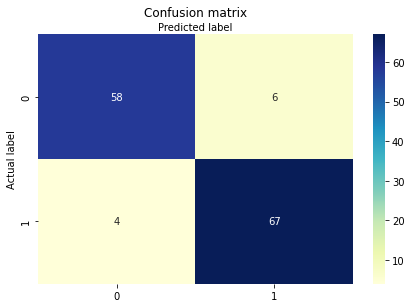

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_NB)
precision = metrics.precision_score(Y_test, Y_pred_NB)
recall = metrics.recall_score(Y_test, Y_pred_NB)
F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F-score : ",F1)

Accuracy :  0.9259259259259259
Precision :  0.9178082191780822
Recall :  0.9436619718309859
F-score :  0.9305555555555556


4. K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)

# fit the model with data
KNN.fit(X_train,Y_train)

Y_pred_KNN = KNN.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix_KNN = metrics.confusion_matrix(Y_test, Y_pred_KNN)
cnf_matrix_KNN

array([[59,  5],
       [ 2, 69]])

Text(0.5, 257.44, 'Predicted label')

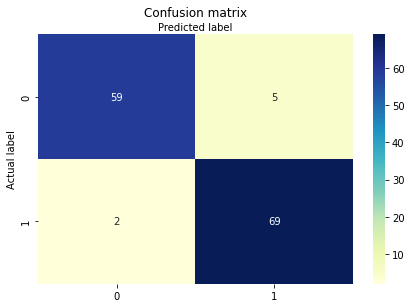

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_KNN), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_KNN)
precision = metrics.precision_score(Y_test, Y_pred_KNN)
recall = metrics.recall_score(Y_test, Y_pred_KNN)
F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F-score : ",F1)

Accuracy :  0.9481481481481482
Precision :  0.9324324324324325
Recall :  0.971830985915493
F-score :  0.9517241379310345
